 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

## Assumptions and limitations

1. Limitation: Only dates that overlap between portfolios will be compared
2. Assumption: There are no significant anomalous price impacting events during the time window such as share split, trading halt
3. Assumption: S&P TSX 60 is representative of the market as a whole, acting as an index

## 0. Import Required Libraries

In [1]:
# Initial imports
import pandas as pd # daataframe manipulation
import numpy as np # calc and numeric manipulatino
import datetime as dt # date and tim 
from pathlib import Path # setting the path for file manipulation
import datetime
import seaborn as sns # advanced plotting/charting library
import matplotlib as plt
pd.options.display.float_format = '{:.6f}'.format # float format to 6 decimal places

# I. Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## A. Whale Returns

Read the Whale Portfolio daily returns and clean the data.

### 1. import whale csv and set index to date

In [2]:
df_wr = pd.read_csv('Resources/whale_returns.csv', index_col="Date")

### 2. Inspect imported data

In [3]:
# look at colums and value head
df_wr.head(3)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        nan                 nan   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          nan                     nan  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213

In [4]:
# look at last few values
df_wr.tail(3)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833

In [5]:
# check dimensions of df
df_wr.shape

(1060, 4)

In [6]:
# get index datatype - for later merging
df_wr.index.dtype

dtype('O')

In [7]:
# get datatypes of all values
df_wr.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

### 3. Count and drop any null values

In [8]:
# Count nulls
df_wr.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls 
df_wr.dropna(inplace=True)

In [10]:
# Count nulls -again to ensure they're removed
df_wr.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
df_wr.count() #double check all values are equal in length

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

### 4. Sort the index to ensure the correct date order for calculations

In [12]:
df_wr.sort_index(inplace=True)

### 5. Rename columns - shorten and make consistent with other tables

In [13]:
# change columns to be consistent and informative
df_wr.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [14]:
df_wr.columns = ['Whale_Soros_Fund_Daily_Returns', 'Whale_Paulson_Daily_Returns',
       'Whale_Tiger_Daily_Returns', 'Whale_Berekshire_Daily_Returns']

### 6. Create copy dataframe with new column for cumulative returns

In [15]:
# copy the dataframe to store cumprod in a new view
df_wr_cumulative = df_wr.copy()

In [16]:
# create a new column in new df for each cumulative daily return using the cumprod function
df_wr_cumulative['Whale_Soros_Fund_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Soros_Fund_Daily_Returns']).cumprod()

In [17]:
df_wr_cumulative['Whale_Paulson_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Paulson_Daily_Returns']).cumprod()

In [18]:
df_wr_cumulative['Whale_Tiger_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Tiger_Daily_Returns']).cumprod()

In [19]:
df_wr_cumulative['Whale_Berekshire_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Berekshire_Daily_Returns']).cumprod()

In [20]:
df_wr_cumulative.head() # check result is consistent against original column ie adds up

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.002230                     0.003241   
2015-03-05                        0.004016                     0.004076   
2015-03-06                       -0.007905                    -0.003574   
2015-03-09                        0.000582                     0.004225   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.002534                        0.004213   
2015-03-05                   0.002355                        0.006726   
2015-03-06                  -0.008481                       -0.013098   
2015-03-09                   0.005843                       -0.001652   

            Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
Date                                                                            
2015-03-03                           0.998734                        0.995019   
2015-03-04                           1.000962                        0.998245   
2015-03-05                           1.004981                        1.002314   
2015-03-06                           0.997037                        0.998731   
2015-03-09                           0.997617                        1.002951   

            Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  
Date                                                                         
2015-03-03                      0.999504                           0.993431  
2015-03-04                      0.996972                           0.997617  
2015-03-05                      0.999319                           1.004327  
2015-03-06                      0.990844                           0.991172  
2015-03-09                      0.996633                           0.989534

In [21]:
# drop returns columns from cumulative df

In [22]:
df_wr_cumulative.columns

Index(['Whale_Soros_Fund_Daily_Returns', 'Whale_Paulson_Daily_Returns',
       'Whale_Tiger_Daily_Returns', 'Whale_Berekshire_Daily_Returns',
       'Whale_Soros_Fund_Daily_CumReturns', 'Whale_Paulson_Daily_CumReturns',
       'Whale_Tiger_Daily_CumReturns', 'Whale_Berekshire_Daily_CumReturns'],
      dtype='object')

In [23]:
df_wr_cumulative = df_wr_cumulative[['Whale_Soros_Fund_Daily_CumReturns', 'Whale_Paulson_Daily_CumReturns','Whale_Tiger_Daily_CumReturns', 'Whale_Berekshire_Daily_CumReturns']]

In [24]:
df_wr_cumulative.head()

Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
Date                                                                            
2015-03-03                           0.998734                        0.995019   
2015-03-04                           1.000962                        0.998245   
2015-03-05                           1.004981                        1.002314   
2015-03-06                           0.997037                        0.998731   
2015-03-09                           0.997617                        1.002951   

            Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  
Date                                                                         
2015-03-03                      0.999504                           0.993431  
2015-03-04                      0.996972                           0.997617  
2015-03-05                      0.999319                           1.004327  
2015-03-06                      0.990844                           0.991172  
2015-03-09                      0.996633                           0.989534

### 7. Look at high level stats & plot for whale portfolios

In [25]:
df_wr.describe(include='all') # basic stats for daily whale returns

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
count                     1059.000000                  1059.000000   
mean                         0.000179                    -0.000203   
std                          0.007842                     0.006977   
min                         -0.032711                    -0.032099   
25%                         -0.003594                    -0.003961   
50%                          0.000467                     0.000000   
75%                          0.004292                     0.003567   
max                          0.042977                     0.029338   

       Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  
count                1059.000000                     1059.000000  
mean                   -0.000081                        0.000501  
std                     0.010824                        0.012831  
min                    -0.139820                       -0.066505  
25%                    -0.004746                       -0.005515  
50%                     0.000232                        0.000617  
75%                     0.005176                        0.007516  
max                     0.080705                        0.061341

In [26]:
df_wr_cumulative.describe(include='all') # basic stats for daily cumulative whale returns

Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
count                        1059.000000                     1059.000000   
mean                            1.049883                        0.876058   
std                             0.073730                        0.088385   
min                             0.881701                        0.691364   
25%                             0.989084                        0.792238   
50%                             1.040493                        0.864336   
75%                             1.119133                        0.949932   
max                             1.204573                        1.050682   

       Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  
count                   1059.000000                        1059.000000  
mean                       1.146284                           1.159732  
std                        0.151043                           0.242778  
min                        0.822799                           0.776232  
25%                        1.016063                           0.935323  
50%                        1.138139                           1.057278  
75%                        1.284809                           1.364337  
max                        1.428464                           1.638119

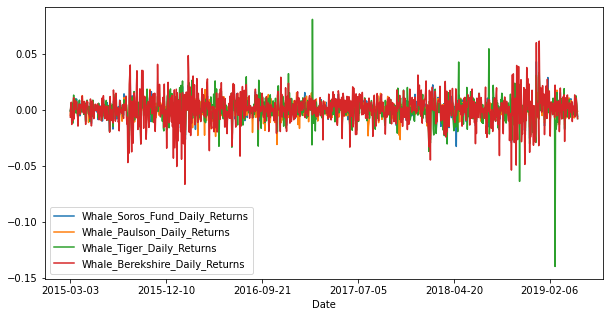

In [27]:
# plot daily returns - whales
df_wr.plot(figsize=(10,5))

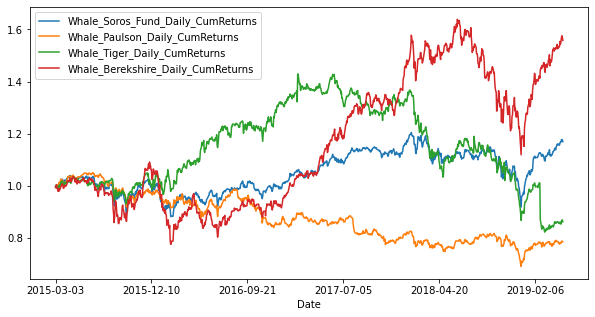

In [28]:
# Plot cumulative returns
df_wr_cumulative.plot(figsize=(10,5))

#### The data looks consistent and there are no obvious data errors identified. 

#### Initial high level observations of standalone daily returns data for whale portfolio:  At initial glance, the mean daily return indicates that Berkshire portfolio performed best (mean daily returns of 0.000501, mean cumulative daily returns 1.159732), while Paulson worst (-0.000203). The standard deviation indicates highest risk for Berkshire (0.012831 STD), while lowest risk/volatility is Paulson (std 0.006977)
#### A more thorough analysis will be done in the following analysis section, so no conclusions are drawn yet. 
#### By looking at the cumulative chart, it is evident that all portfolios were vulnerable to a loss at the same tim around 2019-02-16, but that Berkshir was able to increas the most over time and climb the steepest after the downturn

## B. Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

### 1. import algo csv and set index to date

In [29]:
# Reading algorithmic returns
df_ar = pd.read_csv('Resources/algo_returns.csv', index_col='Date')

### 2. Inspect resulting dataframe and contained data

In [30]:
# look at colums and value first 3 rows
df_ar.head(3)

Algo 1  Algo 2
Date                       
2014-05-28 0.001745     nan
2014-05-29 0.003978     nan
2014-05-30 0.004464     nan

In [31]:
# look at colums and value last 3 rows
df_ar.tail(3)

Algo 1    Algo 2
Date                          
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

In [32]:
# get dimensions of df
df_ar.shape

(1241, 2)

In [33]:
# get index datatype - for later merging
df_ar.index.dtype

dtype('O')

In [34]:
# get datatypes
df_ar.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

### 3. Count and remove null values

In [35]:
# Count nulls
df_ar.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [36]:
# Drop nulls
df_ar.dropna(inplace=True)

In [37]:
# Count nulls -again to ensure that nulls actually are removed
df_ar.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [38]:
df_ar.count()

Algo 1    1235
Algo 2    1235
dtype: int64

### 4. Sort index to ensure correct date order for calculations

In [39]:
df_ar.sort_index(inplace=True)

### 5. Rename columns to be consistent with future merge

In [40]:
df_ar.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

In [41]:
df_ar.columns = ['Algo1_Daily_Returns', 'Algo2_Daily_Returns']

### 6. Create new column in a copy df for cumulative returns per Algo daily return

In [42]:
# create a df copy to store cumulative data
df_ar_cumulative = df_ar.copy() 

In [43]:
# use cumprod to get the daily cumulative returns for each of the algos 1 and 2
df_ar_cumulative['Algo1_Daily_CumReturns'] = (1 + df_ar_cumulative['Algo1_Daily_Returns']).cumprod()

In [44]:
df_ar_cumulative['Algo2_Daily_CumReturns'] = (1 + df_ar_cumulative['Algo2_Daily_Returns']).cumprod()

In [45]:
# check the result is consistent with the daily returns for first few columns
df_ar_cumulative.head(10)

Algo1_Daily_Returns  Algo2_Daily_Returns  Algo1_Daily_CumReturns  \
Date                                                                           
2014-06-05             0.004062             0.013285                1.004062   
2014-06-06             0.001857             0.008284                1.005927   
2014-06-09            -0.005012             0.005668                1.000885   
2014-06-10             0.004406            -0.000735                1.005295   
2014-06-11             0.004760            -0.003761                1.010081   
2014-06-12            -0.000028            -0.003841                1.010052   
2014-06-13             0.001917            -0.000814                1.011989   
2014-06-16             0.001084             0.001831                1.013086   
2014-06-17             0.000922             0.006870                1.014020   
2014-06-18            -0.006303             0.007228                1.007628   

            Algo2_Daily_CumReturns  
Date                                
2014-06-05                1.013285  
2014-06-06                1.021679  
2014-06-09                1.027470  
2014-06-10                1.026714  
2014-06-11                1.022852  
2014-06-12                1.018923  
2014-06-13                1.018094  
2014-06-16                1.019958  
2014-06-17                1.026964  
2014-06-18                1.034387

In [46]:
# drop columns that are not required

In [47]:
df_ar_cumulative.columns # get the columns

Index(['Algo1_Daily_Returns', 'Algo2_Daily_Returns', 'Algo1_Daily_CumReturns',
       'Algo2_Daily_CumReturns'],
      dtype='object')

In [48]:
df_ar_cumulative = df_ar_cumulative[['Algo1_Daily_CumReturns','Algo2_Daily_CumReturns']]

In [49]:
# check result - first few lines
df_ar_cumulative.head(10)

Algo1_Daily_CumReturns  Algo2_Daily_CumReturns
Date                                                      
2014-06-05                1.004062                1.013285
2014-06-06                1.005927                1.021679
2014-06-09                1.000885                1.027470
2014-06-10                1.005295                1.026714
2014-06-11                1.010081                1.022852
2014-06-12                1.010052                1.018923
2014-06-13                1.011989                1.018094
2014-06-16                1.013086                1.019958
2014-06-17                1.014020                1.026964
2014-06-18                1.007628                1.034387

### 7. Look at high level stats & plot for algo portfolios

In [50]:
df_ar.describe(include='all') # stats for daily returns

Algo1_Daily_Returns  Algo2_Daily_Returns
count          1235.000000          1235.000000
mean              0.000654             0.000341
std               0.007988             0.008466
min              -0.030951            -0.036937
25%              -0.003252            -0.003733
50%               0.000094             0.000581
75%               0.003901             0.005194
max               0.098246             0.083734

In [51]:
df_ar_cumulative.describe(include='all') # stats for daily cumulative returns

Algo1_Daily_CumReturns  Algo2_Daily_CumReturns
count             1235.000000             1235.000000
mean                 1.469760                1.228900
std                  0.294720                0.159139
min                  0.962939                0.912747
25%                  1.127517                1.097729
50%                  1.545455                1.181145
75%                  1.611602                1.370561
max                  2.195434                1.526028

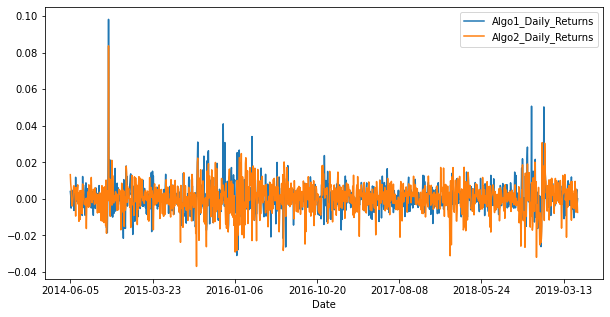

In [52]:
# plot daily returns  - algos
df_ar.plot(figsize=(10,5))

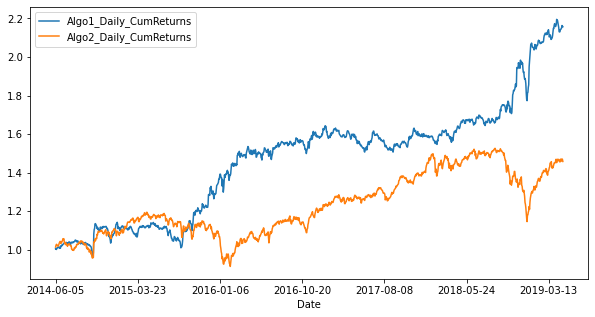

In [53]:
# plot daily cumulative returns  - algos
df_ar_cumulative.plot(figsize=(10,5))

#### The data looks consistent and there are no obvious errors identified. 

#### Initial observations of standalone daily returns data for Algo 1 vs Algo 2:  mean daily return indicates that Algo 1 (mean daily return 0.000654) performs slightly better than Algo 2 (mean daily return 0.000341), which is alo evident in the cumulative daily returns plot. When looking at just daily returns, Algo 2 is more risky, but when looking at cumulative returns, Algo 1 is more risky (ie higher standard deviation). 

## C. S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 
Note: this contains daily closing and not returns - needs to be converted

### 1. Import S&P csv daily closing price (not returns)

In [54]:
# Reading S&P TSX 60 Closing Prices

df_sr = pd.read_csv('Resources/sp_tsx_history.csv')

### 2. Inspect columns of dataframe

In [55]:
# look at colums and value head
df_sr.head(3)

Date       Close
0  1-Oct-2012  $12,370.19
1  2-Oct-2012  $12,391.23
2  3-Oct-2012  $12,359.47

In [56]:
# look at tail values
df_sr.tail(3)

Date       Close
1815  24-Dec-2019  $17,180.15
1816  27-Dec-2019  $17,168.21
1817  30-Dec-2019  $17,098.56

#### Note from dataframe inspection: 
#### 1. date column was not immediated converted because it is in
#### a different format to the other csv files and 
#### needs to bee converted to consistent format first
#### 2. Close cannot be explicitly converted to float as it has
#### dollar and commas. 
#### 3. A new column for returns will need to be created from 
#### return calculations. 

In [57]:
# check dimension of df
df_sr.shape

(1818, 2)

In [58]:
# Check Data Types
df_sr.dtypes

Date     object
Close    object
dtype: object

### 3. Convert the date into a consistent format with other tables

In [59]:
df_sr['Date']= pd.to_datetime(df_sr['Date']).dt.strftime('%Y-%m-%d')


### 4. Convert the date data to index and check format and data type

In [60]:
# set date as index
df_sr.set_index('Date', inplace=True)

In [61]:
df_sr.head(2)

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23

In [62]:
df_sr.index.dtype

dtype('O')

### 5. Check for null values

In [63]:
# Count nulls - none observed
df_ar.isna().sum()

Algo1_Daily_Returns    0
Algo2_Daily_Returns    0
dtype: int64

### 6. Convert daily closing price to float (from string)

In [64]:
# Change the Closing column to b float type
df_sr['Close']= df_sr['Close'].str.replace('$','')
df_sr['Close']= df_sr['Close'].str.replace(',','')
df_sr['Close']= df_sr['Close'].astype(float)

In [65]:
# Check Data Types
df_sr.dtypes

Close    float64
dtype: object

In [66]:
# test 
df_sr.iloc[0]

Close   12370.190000
Name: 2012-10-01, dtype: float64

In [67]:
# check null values
df_sr.isna().sum()

Close    0
dtype: int64

In [68]:
df_sr.count()

Close    1818
dtype: int64

### 7. Sort the index for calculations of returns

In [69]:
# sort_index 
df_sr.sort_index(inplace=True)

In [70]:
df_sr.head(2)

Close
Date                   
2012-10-01 12370.190000
2012-10-02 12391.230000

### 8. Calculate daily returns and store in new column

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

The daily return is the (current closing price minus the previous day closing price) all divided by the previous day closing price. The initial value has no daily return as there is no prior period to compare it with. 

Here the calculation uses the python shift function 

In [71]:

df_sr['SnP_TSX_60_Returns'] = (df_sr['Close'] - df_sr['Close'].shift(1))/ df_sr['Close'].shift(1)

In [72]:
df_sr.head(10)

Close  SnP_TSX_60_Returns
Date                                       
2012-10-01 12370.190000                 nan
2012-10-02 12391.230000            0.001701
2012-10-03 12359.470000           -0.002563
2012-10-04 12447.680000            0.007137
2012-10-05 12418.990000           -0.002305
2012-10-09 12273.570000           -0.011709
2012-10-10 12212.420000           -0.004982
2012-10-11 12233.950000            0.001763
2012-10-12 12202.040000           -0.002608
2012-10-15 12229.960000            0.002288

### 9. Cross check conversion to daily returns against alternative method - pct_change function

In [73]:
df_sr['SnP_TSX_60_Returns'] = df_sr['Close'].pct_change()
df_sr.head(10)

Close  SnP_TSX_60_Returns
Date                                       
2012-10-01 12370.190000                 nan
2012-10-02 12391.230000            0.001701
2012-10-03 12359.470000           -0.002563
2012-10-04 12447.680000            0.007137
2012-10-05 12418.990000           -0.002305
2012-10-09 12273.570000           -0.011709
2012-10-10 12212.420000           -0.004982
2012-10-11 12233.950000            0.001763
2012-10-12 12202.040000           -0.002608
2012-10-15 12229.960000            0.002288

#### Methods cross check - looks good - continue

In [74]:
# check for null - first row would have null
df_sr.isna().sum()

Close                 0
SnP_TSX_60_Returns    1
dtype: int64

In [75]:
# Drop nulls - first row
df_sr.dropna(inplace=True)

In [76]:
# Rename `Close` Column to be specific to this portfolio.
df_sr.columns

Index(['Close', 'SnP_TSX_60_Returns'], dtype='object')

In [77]:
df_sr.head()

Close  SnP_TSX_60_Returns
Date                                       
2012-10-02 12391.230000            0.001701
2012-10-03 12359.470000           -0.002563
2012-10-04 12447.680000            0.007137
2012-10-05 12418.990000           -0.002305
2012-10-09 12273.570000           -0.011709

### 10. Drop original Closing column - not needed for comparison

In [78]:
df_sr = df_sr[['SnP_TSX_60_Returns']] 

In [79]:
df_sr.columns

Index(['SnP_TSX_60_Returns'], dtype='object')

### 11. Create new column in a copy df for cumulative returns per daily return S&P TSX 60

In [80]:
df_sr_cumulative = df_sr.copy()

In [81]:
# use cumprod to get the daily cumulative returns for each of the algos 1 and 2
df_sr_cumulative['SnP_TSX_60_CumReturns'] = (1+df_sr_cumulative['SnP_TSX_60_Returns']).cumprod()

In [82]:
# visually check first 10 rows to ensure that results make sense
df_sr_cumulative.head(10)

SnP_TSX_60_Returns  SnP_TSX_60_CumReturns
Date                                                 
2012-10-02            0.001701               1.001701
2012-10-03           -0.002563               0.999133
2012-10-04            0.007137               1.006264
2012-10-05           -0.002305               1.003945
2012-10-09           -0.011709               0.992189
2012-10-10           -0.004982               0.987246
2012-10-11            0.001763               0.988986
2012-10-12           -0.002608               0.986407
2012-10-15            0.002288               0.988664
2012-10-16            0.014533               1.003032

In [83]:
# drop daily returns column from cumulative df
df_sr_cumulative = df_sr_cumulative[['SnP_TSX_60_CumReturns']]

In [84]:
df_sr_cumulative.head()

SnP_TSX_60_CumReturns
Date                             
2012-10-02               1.001701
2012-10-03               0.999133
2012-10-04               1.006264
2012-10-05               1.003945
2012-10-09               0.992189

### 12. Look at high level stats & plot for algo portfolios

In [85]:
df_sr.describe()

SnP_TSX_60_Returns
count         1817.000000
mean             0.000200
std              0.006637
min             -0.031241
25%             -0.003156
50%              0.000653
75%              0.004115
max              0.029389

In [86]:
df_sr_cumulative.describe()

SnP_TSX_60_CumReturns
count            1817.000000
mean                1.186681
std                 0.107322
min                 0.954826
25%                 1.101159
50%                 1.206455
75%                 1.263479
max                 1.388835

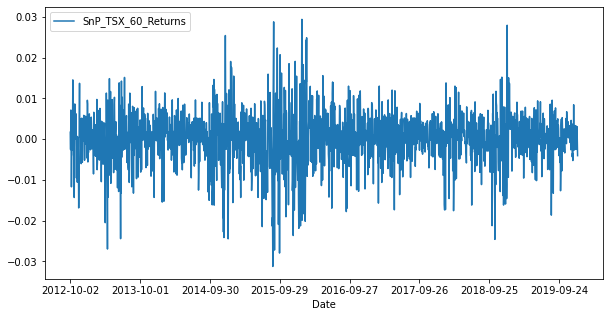

In [87]:
# plot daily returns  - S&P TSX 60
df_sr.plot(figsize=(10,5))

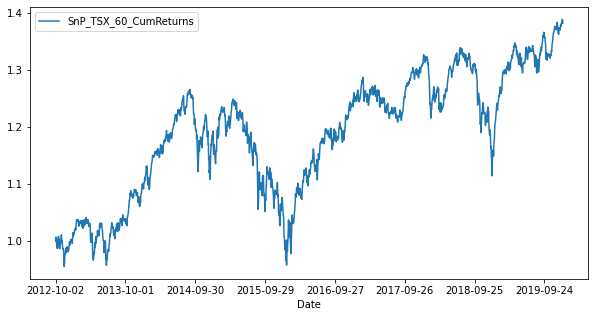

In [88]:
# plot daily returns  - S&P TSX 60
df_sr_cumulative.plot(figsize=(10,5))

## D. Combine Whale, Algorithmic, and S&P TSX 60 Returns

### 1. Merge daily returns dataframes from all portfolios

In [89]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
merged_analysis_df_tmp = pd.concat([df_wr, df_ar ], axis="columns", join="inner")

In [90]:
merged_analysis_df_tmp.head(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.002230                     0.003241   
2015-03-05                        0.004016                     0.004076   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.002534                        0.004213   
2015-03-05                   0.002355                        0.006726   

            Algo1_Daily_Returns  Algo2_Daily_Returns  
Date                                                  
2015-03-03            -0.001942            -0.000949  
2015-03-04            -0.008589             0.002416  
2015-03-05            -0.000955             0.004323

In [91]:
# Use the `concat` function to combine the two DataFrames by matching indexes
merged_daily_returns_df = pd.concat([merged_analysis_df_tmp, df_sr ], axis="columns", join="inner")

In [92]:
merged_daily_returns_df.head(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.002230                     0.003241   
2015-03-05                        0.004016                     0.004076   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.002534                        0.004213   
2015-03-05                   0.002355                        0.006726   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03            -0.001942            -0.000949           -0.008530  
2015-03-04            -0.008589             0.002416           -0.003371  
2015-03-05            -0.000955             0.004323            0.001344

In [93]:
merged_daily_returns_df.tail(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2019-04-29                        0.001254                     0.002719   
2019-04-30                       -0.001295                    -0.002211   
2019-05-01                       -0.005847                    -0.001341   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2019-04-29                   0.006251                        0.005223   
2019-04-30                  -0.000259                       -0.003702   
2019-05-01                  -0.007936                       -0.007833   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2019-04-29             0.005208             0.002829           -0.000788  
2019-04-30            -0.002944            -0.001570           -0.001183  
2019-05-01             0.000094            -0.007358           -0.004703

In [94]:
merged_daily_returns_df.shape

(1029, 7)

# II Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## A. Performance Anlysis

#### Calculate and Plot the daily returns

### 1. Plot of daily returns

NameError: name 'x' is not defined

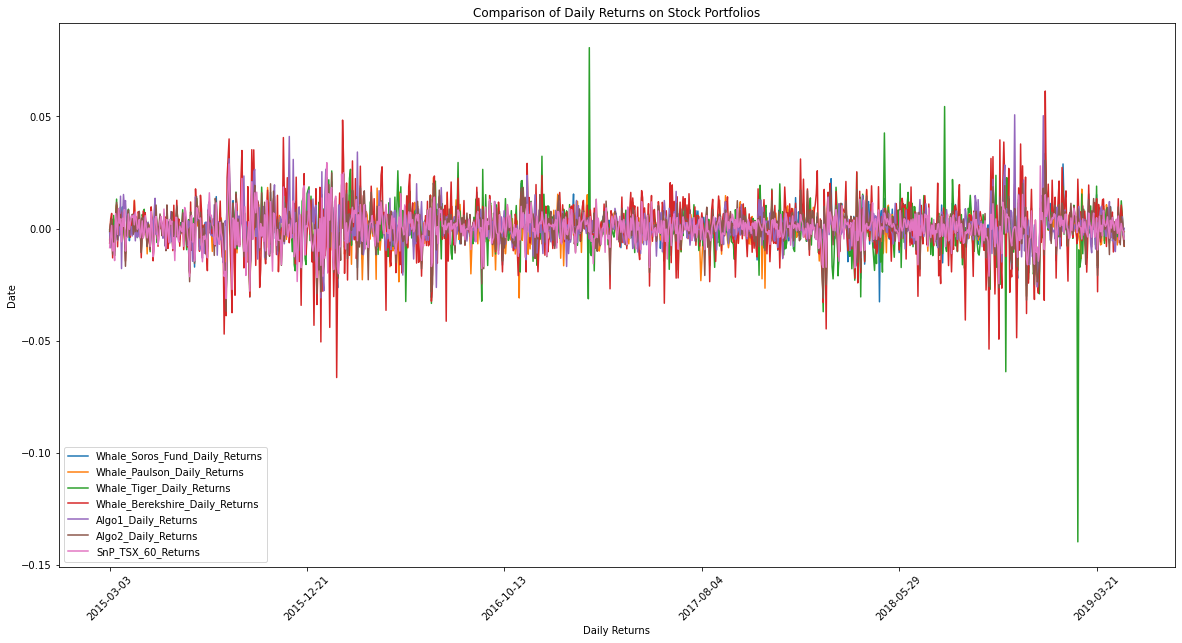

In [210]:
# Plot daily returns of all portfolios
drp = merged_daily_returns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Returns on Stock Portfolios')
drp.set_xlabel("Daily Returns")
drp.set_ylabel("Date")

#### Calculate and Plot cumulative returns.

### 2. Merge Cumulative Daily Returns

Calculations were already done in the first section

In [96]:
# Use the `concat` function to combine the two DataFrames by matching indexes
merged_cumulative__df_tmp = pd.concat([df_wr_cumulative, df_ar_cumulative ], axis="columns", join="inner")

In [97]:
merged_daily_cumreturns_df = pd.concat([merged_cumulative__df_tmp, df_sr_cumulative ], axis="columns", join="inner")

In [98]:
merged_daily_cumreturns_df.head()

Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
Date                                                                            
2015-03-03                           0.998734                        0.995019   
2015-03-04                           1.000962                        0.998245   
2015-03-05                           1.004981                        1.002314   
2015-03-06                           0.997037                        0.998731   
2015-03-09                           0.997617                        1.002951   

            Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  \
Date                                                                          
2015-03-03                      0.999504                           0.993431   
2015-03-04                      0.996972                           0.997617   
2015-03-05                      0.999319                           1.004327   
2015-03-06                      0.990844                           0.991172   
2015-03-09                      0.996633                           0.989534   

            Algo1_Daily_CumReturns  Algo2_Daily_CumReturns  \
Date                                                         
2015-03-03                1.104979                1.156329   
2015-03-04                1.095489                1.159122   
2015-03-05                1.094442                1.164134   
2015-03-06                1.089018                1.150792   
2015-03-09                1.083086                1.152292   

            SnP_TSX_60_CumReturns  
Date                               
2015-03-03               1.223413  
2015-03-04               1.219289  
2015-03-05               1.220928  
2015-03-06               1.208753  
2015-03-09               1.200830

Text(0, 0.5, 'Date')

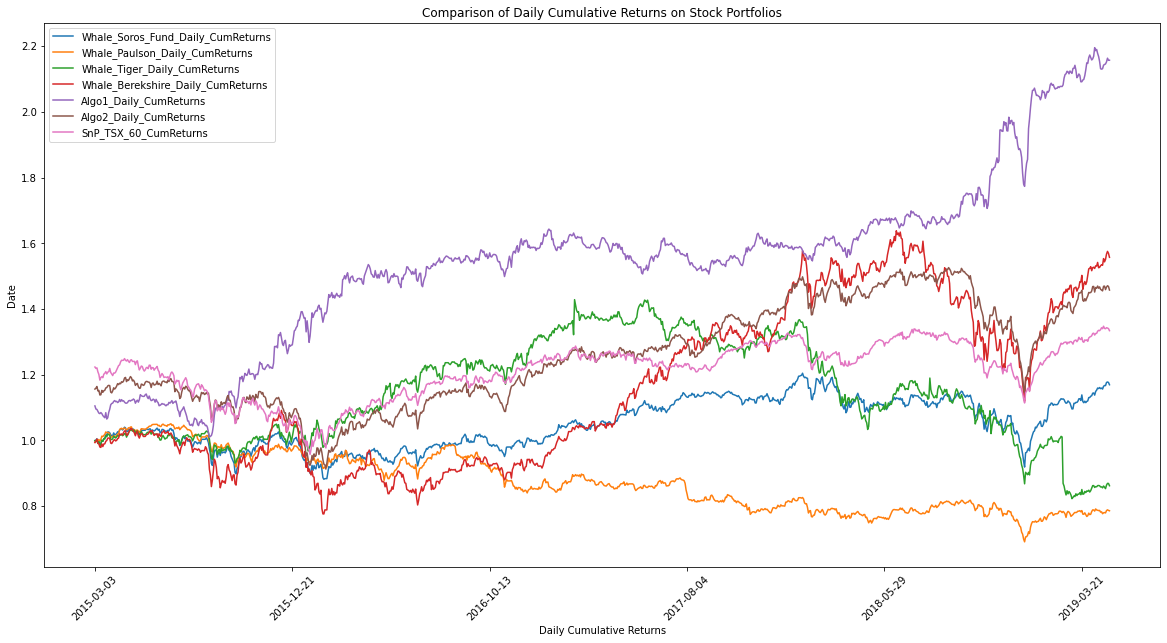

In [99]:
# Plot cumulative returns

dcrp = merged_daily_cumreturns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Cumulative Returns on Stock Portfolios')
dcrp.set_xlabel("Daily Cumulative Returns")
dcrp.set_ylabel("Date")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


## [[TODO - is this over the daily returns or cumulative returns??]]

Text(17.200000000000017, 0.5, 'Date')

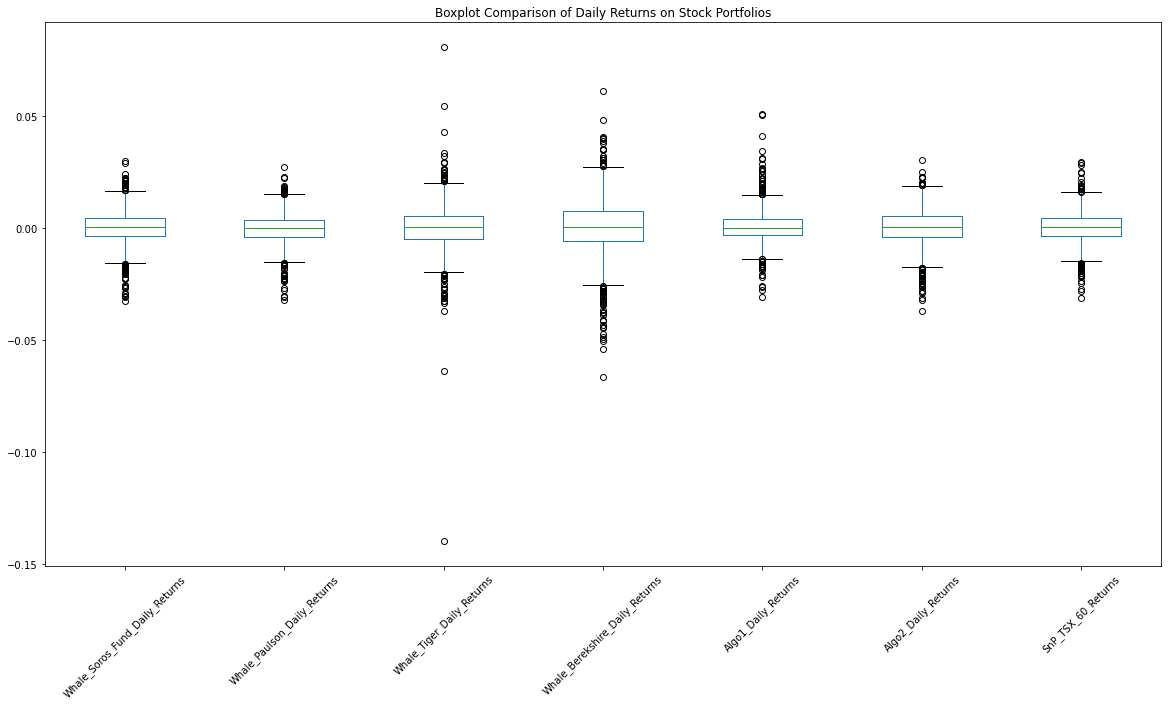

In [100]:
# Box plot to visually show risk
mcrb = merged_daily_returns_df.plot.box(figsize=(20,10), rot=45, title='Boxplot Comparison of Daily Returns on Stock Portfolios')
dcrp.set_xlabel("Daily Returns")
dcrp.set_ylabel("Date")

### Calculate Standard Deviations

In [101]:
# Daily standard deviation of daily returns sorted in ascending ordeer
daily_std = merged_daily_returns_df.std().sort_values()
daily_std

Whale_Paulson_Daily_Returns      0.006982
SnP_TSX_60_Returns               0.007034
Algo1_Daily_Returns              0.007589
Whale_Soros_Fund_Daily_Returns   0.007828
Algo2_Daily_Returns              0.008326
Whale_Tiger_Daily_Returns        0.010883
Whale_Berekshire_Daily_Returns   0.012826
dtype: float64

Text(0, 0.5, 'Portfolio')

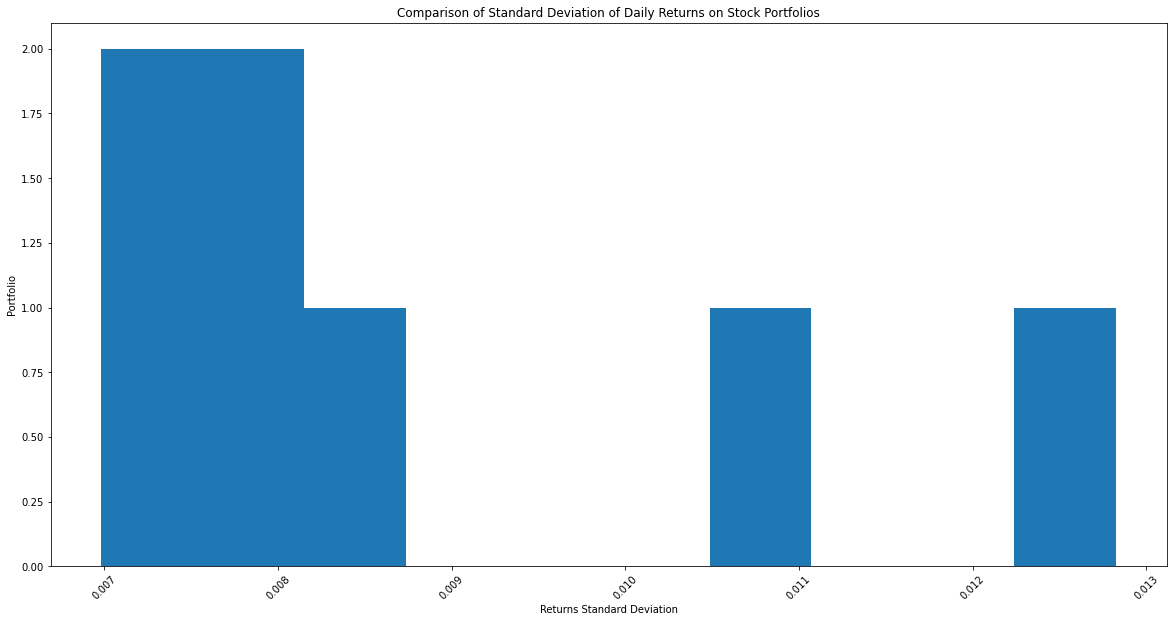

In [102]:
mcrb = daily_std.plot.hist(figsize=(20,10), rot=45, title='Comparison of Standard Deviation of Daily Returns on Stock Portfolios')
mcrb.set_xlabel("Returns Standard Deviation")
mcrb.set_ylabel("Portfolio")

# [[todo ]] annualized_std.plot.hist(stacked=True)

### Determine which portfolios are riskier than the S&P TSX 60

In [103]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60


By sorting in ordere of srd deviation on daily return above, the riskier portfolios than S&P TSX 60 are all eexcept Whale Paulson portfolio, as all others have higher std deviation than S&P TSX 60

### Calculate the Annualized Standard Deviation

In [104]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

Whale_Paulson_Daily_Returns      0.110841
SnP_TSX_60_Returns               0.111664
Algo1_Daily_Returns              0.120470
Whale_Soros_Fund_Daily_Returns   0.124259
Algo2_Daily_Returns              0.132177
Whale_Tiger_Daily_Returns        0.172759
Whale_Berekshire_Daily_Returns   0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [105]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

roll21_srd = merged_daily_returns_df.rolling(window=21).std()

roll21_srd

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                             nan                          nan   
2015-03-04                             nan                          nan   
2015-03-05                             nan                          nan   
2015-03-06                             nan                          nan   
2015-03-09                             nan                          nan   
...                                    ...                          ...   
2019-04-25                        0.004145                     0.005572   
2019-04-26                        0.004117                     0.005649   
2019-04-29                        0.004123                     0.005374   
2019-04-30                        0.004199                     0.005408   
2019-05-01                        0.004271                     0.005009   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                        nan                             nan   
2015-03-04                        nan                             nan   
2015-03-05                        nan                             nan   
2015-03-06                        nan                             nan   
2015-03-09                        nan                             nan   
...                               ...                             ...   
2019-04-25                   0.004917                        0.006641   
2019-04-26                   0.005424                        0.006599   
2019-04-29                   0.005438                        0.006584   
2019-04-30                   0.005419                        0.006323   
2019-05-01                   0.005744                        0.006143   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03                  nan                  nan                 nan  
2015-03-04                  nan                  nan                 nan  
2015-03-05                  nan                  nan                 nan  
2015-03-06                  nan                  nan                 nan  
2015-03-09                  nan                  nan                 nan  
...                         ...                  ...                 ...  
2019-04-25             0.005801             0.005764            0.003370  
2019-04-26             0.005562             0.005700            0.003321  
2019-04-29             0.005251             0.005622            0.003356  
2019-04-30             0.005294             0.005600            0.003240  
2019-05-01             0.004972             0.005686            0.003150  

[1029 rows x 7 columns]

Text(0, 0.5, 'Standard Deviation')

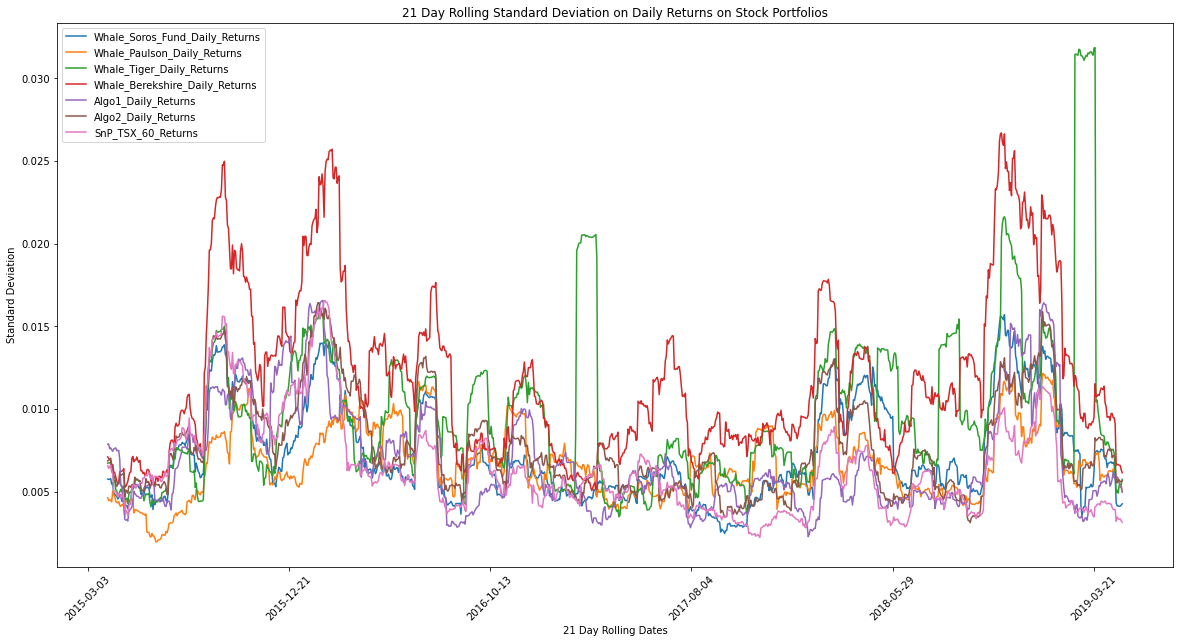

In [106]:
# Plot the rolling standard deviation on all daily return (not closing price)
rollsp = merged_daily_returns_df.rolling(window=21).std().plot(figsize=(20,10), rot=45, title='21 Day Rolling Standard Deviation on Daily Returns on Stock Portfolios')
rollsp.set_xlabel("21 Day Rolling Dates")
rollsp.set_ylabel("Standard Deviation")

### Calculate and plot the correlation

In [107]:
# Calculate the correlation between each column
correlation = merged_daily_returns_df.corr()
correlation

Whale_Soros_Fund_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        1.000000   
Whale_Paulson_Daily_Returns                           0.697076   
Whale_Tiger_Daily_Returns                             0.560964   
Whale_Berekshire_Daily_Returns                        0.750181   
Algo1_Daily_Returns                                   0.313795   
Algo2_Daily_Returns                                   0.826667   
SnP_TSX_60_Returns                                    0.673930   

                                Whale_Paulson_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                     0.697076   
Whale_Paulson_Daily_Returns                        1.000000   
Whale_Tiger_Daily_Returns                          0.433034   
Whale_Berekshire_Daily_Returns                     0.540033   
Algo1_Daily_Returns                                0.266363   
Algo2_Daily_Returns                                0.674015   
SnP_TSX_60_Returns                                 0.486511   

                                Whale_Tiger_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                   0.560964   
Whale_Paulson_Daily_Returns                      0.433034   
Whale_Tiger_Daily_Returns                        1.000000   
Whale_Berekshire_Daily_Returns                   0.423524   
Algo1_Daily_Returns                              0.161236   
Algo2_Daily_Returns                              0.506689   
SnP_TSX_60_Returns                               0.440583   

                                Whale_Berekshire_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        0.750181   
Whale_Paulson_Daily_Returns                           0.540033   
Whale_Tiger_Daily_Returns                             0.423524   
Whale_Berekshire_Daily_Returns                        1.000000   
Algo1_Daily_Returns                                   0.289378   
Algo2_Daily_Returns                                   0.684609   
SnP_TSX_60_Returns                                    0.557250   

                                Algo1_Daily_Returns  Algo2_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns             0.313795             0.826667   
Whale_Paulson_Daily_Returns                0.266363             0.674015   
Whale_Tiger_Daily_Returns                  0.161236             0.506689   
Whale_Berekshire_Daily_Returns             0.289378             0.684609   
Algo1_Daily_Returns                        1.000000             0.285455   
Algo2_Daily_Returns                        0.285455             1.000000   
SnP_TSX_60_Returns                         0.310276             0.737370   

                                SnP_TSX_60_Returns  
Whale_Soros_Fund_Daily_Returns            0.673930  
Whale_Paulson_Daily_Returns               0.486511  
Whale_Tiger_Daily_Returns                 0.440583  
Whale_Berekshire_Daily_Returns            0.557250  
Algo1_Daily_Returns                       0.310276  
Algo2_Daily_Returns                       0.737370  
SnP_TSX_60_Returns                        1.000000

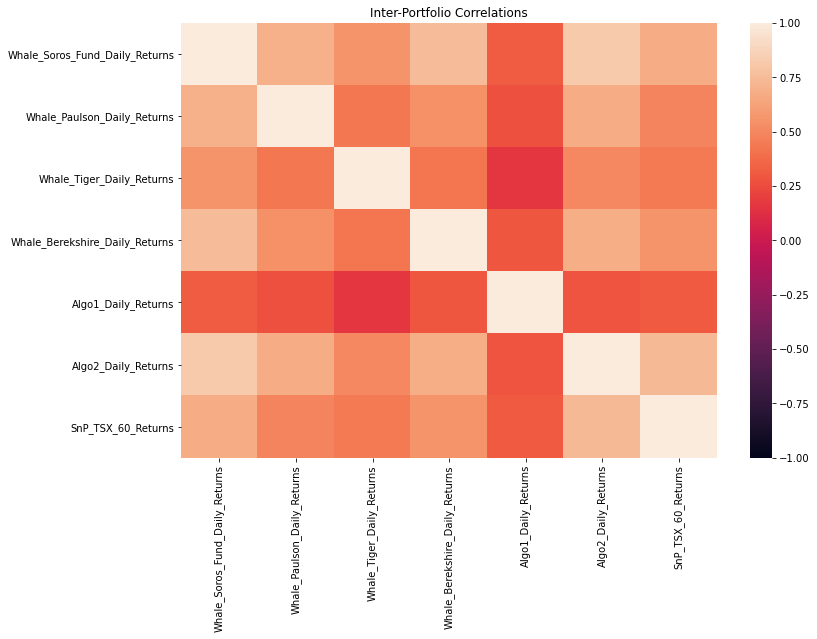

In [108]:
# Display correlation matrix

import matplotlib.pyplot as plt

fig = plt.gcf()

# Set the title
plt.title('Inter-Portfolio Correlations')

# Change seaborn plot size
fig.set_size_inches(12, 8)


sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [109]:

# Covariance of Whales against SnP TSX 60 Returns
Whale_Soros_Covariance = df_wr["Whale_Soros_Fund_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Whale_Paulson_Covariance = df_wr["Whale_Paulson_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Whale_Tiger_Covariance = df_wr["Whale_Tiger_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Whale_Berekshire_Covariance = df_wr["Whale_Berekshire_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])

# Display the covariance of each whale sub-portfolio
print("Soros Covariance: ", "%.16f" % Whale_Soros_Covariance)
print("Paulson Covariance: ", "%.16f" % Whale_Paulson_Covariance)
print("Tiger Covariance: ", "%.16f" % Whale_Tiger_Covariance)
print("Berekshire Covariance: ", "%.16f" % Whale_Berekshire_Covariance)

Soros Covariance:  0.0000368908254085
Paulson Covariance:  0.0000237575445132
Tiger Covariance:  0.0000335320597564
Berekshire Covariance:  0.0000499796288463


In [110]:
# Covariance of Whales against SnP TSX 60 Returns
Algo1_Covariance = df_ar["Algo1_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Algo2_Covariance = df_ar["Algo2_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])

# Display the covariance of each whale sub-portfolio
print("Algo1 Covariance: ", "%.16f" % Algo1_Covariance)
print("Algo2 Covariance: ", "%.16f" % Algo2_Covariance)



Algo1 Covariance:  0.0000180761968037
Algo2 Covariance:  0.0000428478621474


In [111]:
# covariance of algos portfolio (within the portfolio)
covariance_algo = df_ar.cov()
covariance_algo

Algo1_Daily_Returns  Algo2_Daily_Returns
Algo1_Daily_Returns             0.000064             0.000023
Algo2_Daily_Returns             0.000023             0.000072

In [112]:
# covariance of s&p 60 TSR portfolio
covariance_snp = df_sr.cov()
covariance_snp

SnP_TSX_60_Returns
SnP_TSX_60_Returns            0.000044

In [113]:
# Calculate covariance of a single sub-portfolio streams in portfolios
# how each individual sub-portfolios covary with other sub-portfolios
# similar evaluation to correlation heat map
covariance_a = merged_daily_returns_df.cov()
covariance_a

Whale_Soros_Fund_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        0.000061   
Whale_Paulson_Daily_Returns                           0.000038   
Whale_Tiger_Daily_Returns                             0.000048   
Whale_Berekshire_Daily_Returns                        0.000075   
Algo1_Daily_Returns                                   0.000019   
Algo2_Daily_Returns                                   0.000054   
SnP_TSX_60_Returns                                    0.000037   

                                Whale_Paulson_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                     0.000038   
Whale_Paulson_Daily_Returns                        0.000049   
Whale_Tiger_Daily_Returns                          0.000033   
Whale_Berekshire_Daily_Returns                     0.000048   
Algo1_Daily_Returns                                0.000014   
Algo2_Daily_Returns                                0.000039   
SnP_TSX_60_Returns                                 0.000024   

                                Whale_Tiger_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                   0.000048   
Whale_Paulson_Daily_Returns                      0.000033   
Whale_Tiger_Daily_Returns                        0.000118   
Whale_Berekshire_Daily_Returns                   0.000059   
Algo1_Daily_Returns                              0.000013   
Algo2_Daily_Returns                              0.000046   
SnP_TSX_60_Returns                               0.000034   

                                Whale_Berekshire_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        0.000075   
Whale_Paulson_Daily_Returns                           0.000048   
Whale_Tiger_Daily_Returns                             0.000059   
Whale_Berekshire_Daily_Returns                        0.000164   
Algo1_Daily_Returns                                   0.000028   
Algo2_Daily_Returns                                   0.000073   
SnP_TSX_60_Returns                                    0.000050   

                                Algo1_Daily_Returns  Algo2_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns             0.000019             0.000054   
Whale_Paulson_Daily_Returns                0.000014             0.000039   
Whale_Tiger_Daily_Returns                  0.000013             0.000046   
Whale_Berekshire_Daily_Returns             0.000028             0.000073   
Algo1_Daily_Returns                        0.000058             0.000018   
Algo2_Daily_Returns                        0.000018             0.000069   
SnP_TSX_60_Returns                         0.000017             0.000043   

                                SnP_TSX_60_Returns  
Whale_Soros_Fund_Daily_Returns            0.000037  
Whale_Paulson_Daily_Returns               0.000024  
Whale_Tiger_Daily_Returns                 0.000034  
Whale_Berekshire_Daily_Returns            0.000050  
Algo1_Daily_Returns                       0.000017  
Algo2_Daily_Returns                       0.000043  
SnP_TSX_60_Returns                        0.000049

In [114]:
# Calculate variance of S&P TSX
variance_snp = df_sr.var()
variance_snp

SnP_TSX_60_Returns   0.000044
dtype: float64

In [115]:
# Beta Values for Whales Sub-Portfolios
# Calculate beta of all daily returns of whale portfolio
Soros_beta = Whale_Soros_Covariance / variance_snp
Paulson_beta = Whale_Paulson_Covariance / variance_snp
Tiger_beta = Whale_Tiger_Covariance / variance_snp
Berekshire_beta = Whale_Berekshire_Covariance / variance_snp


# Display the covariance of each Whale sub-portfolio
print("Soros Beta: ", "%.16f" % Soros_beta)
print("Paulson Beta: ", "%.16f" % Paulson_beta)
print("Tiger Beta: ", "%.16f" % Tiger_beta)
print("Berekshire Beta: ", "%.16f" % Berekshire_beta)
print("--------------------")

Average_Whale_beta = (Soros_beta  + Paulson_beta + Tiger_beta +  Berekshire_beta)/4
print("Average Whale Beta: ", "%.16f" % Average_Whale_beta)

Soros Beta:  0.8373890745840624
Paulson Beta:  0.5392752261303219
Tiger Beta:  0.7611480680473154
Berekshire Beta:  1.1344933241321515
--------------------
Average Whale Beta:  0.8180764232234627


In [116]:
# Beta Values for Algos Sub-Portfolios
# Calculate beta of all daily returns of Algos portfolio
Algo1_beta = Algo1_Covariance / variance_snp
Algo2_beta = Algo2_Covariance / variance_snp


# Display the covariance of each Algos sub-portfolio
print("Algo1 Beta: ", "%.16f" % Algo1_beta)
print("Algo2 Beta: ", "%.16f" % Algo2_beta)

print("--------------------")

Average_Algo_beta = (Algo1_beta  + Algo2_beta)/2
print("Average Algo Beta: ", "%.16f" % Average_Algo_beta)

Algo1 Beta:  0.4103136632433291
Algo2 Beta:  0.9726085343504617
--------------------
Average Algo Beta:  0.6914610987968954


In [117]:
# 21 day rolling covariance of algo portfolio stocks vs. S&P TSX 60
rolling_algo1_covariance = merged_daily_returns_df["Algo1_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_algo2_covariance = merged_daily_returns_df["Algo2_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])

# 21 day rolling covariance of whale portfolio stocks vs. S&P TSX 60
rolling_Soros_covariance = merged_daily_returns_df["Whale_Soros_Fund_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Paulson_covariance =  merged_daily_returns_df["Whale_Paulson_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Tiger_covariance = merged_daily_returns_df["Whale_Tiger_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Berkshire_covariance = merged_daily_returns_df["Whale_Berekshire_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])

# 21 day rolling S&P TSX 60 covariance
rolling_SnP_covariance = merged_daily_returns_df["SnP_TSX_60_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])


# 21 day rolling variance of S&P TSX 60
rolling_variance = merged_daily_returns_df["SnP_TSX_60_Returns"].rolling(window=21).var()

# 21 day rolling beta of algo portfolio stocks vs. S&P TSX 60
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
rolling_algo2_beta = rolling_algo2_covariance / rolling_variance

# 21 day average beta for algo portfolio
rolling_average_algo_beta = (rolling_algo1_beta + rolling_algo1_beta)/2

# 21 day rolling beta of whale portfolio stocks vs. S&P TSX 60
rolling_Soros_beta = rolling_Soros_covariance / rolling_variance
rolling_Paulson_beta = rolling_Paulson_covariance / rolling_variance
rolling_Tiger_beta = rolling_Tiger_covariance / rolling_variance
rolling_Berkshire_beta = rolling_Berkshire_covariance / rolling_variance
rolling_SnP_Beta = rolling_SnP_covariance/ rolling_variance

# 21 day average beta for whale portfolio
rolling_average_whale_beta = (rolling_Soros_beta + rolling_Paulson_beta + rolling_Tiger_beta + rolling_Berkshire_beta)/4


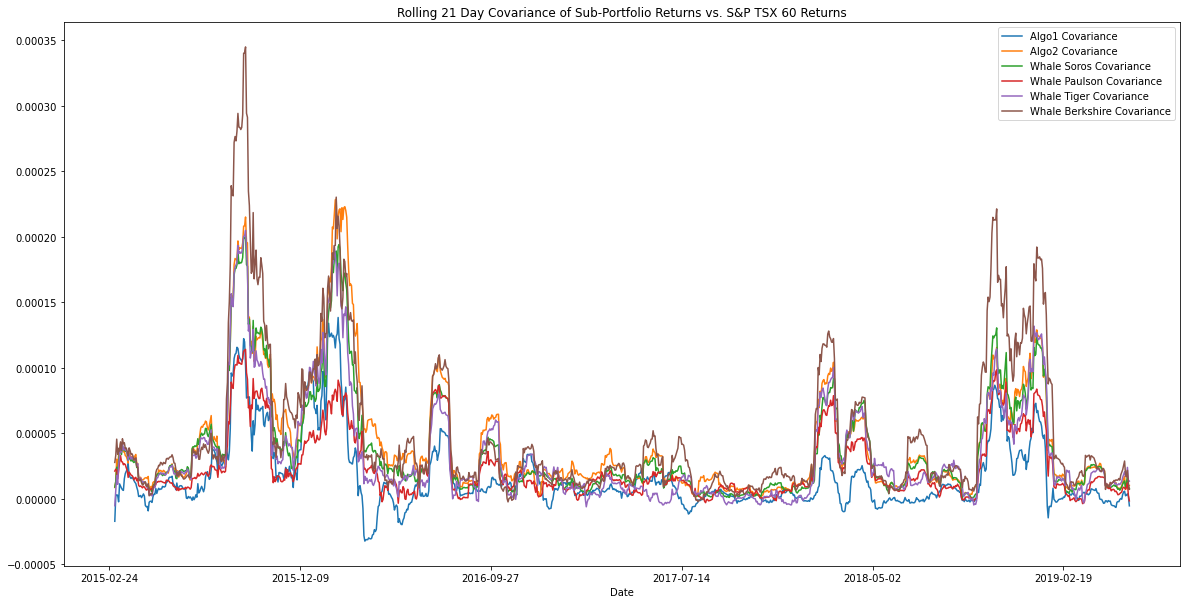

In [118]:
# Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = rolling_algo1_covariance.plot(figsize=(20, 10), title="Rolling 21 Day Covariance of Sub-Portfolio Returns vs. S&P TSX 60 Returns")
rolling_algo2_covariance.plot(ax=ax)
rolling_Soros_covariance.plot(ax=ax)
rolling_Paulson_covariance.plot(ax=ax)
rolling_Tiger_covariance.plot(ax=ax)
rolling_Berkshire_covariance.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo1 Covariance", "Algo2 Covariance", "Whale Soros Covariance", "Whale Paulson Covariance", "Whale Tiger Covariance","Whale Berkshire Covariance"])

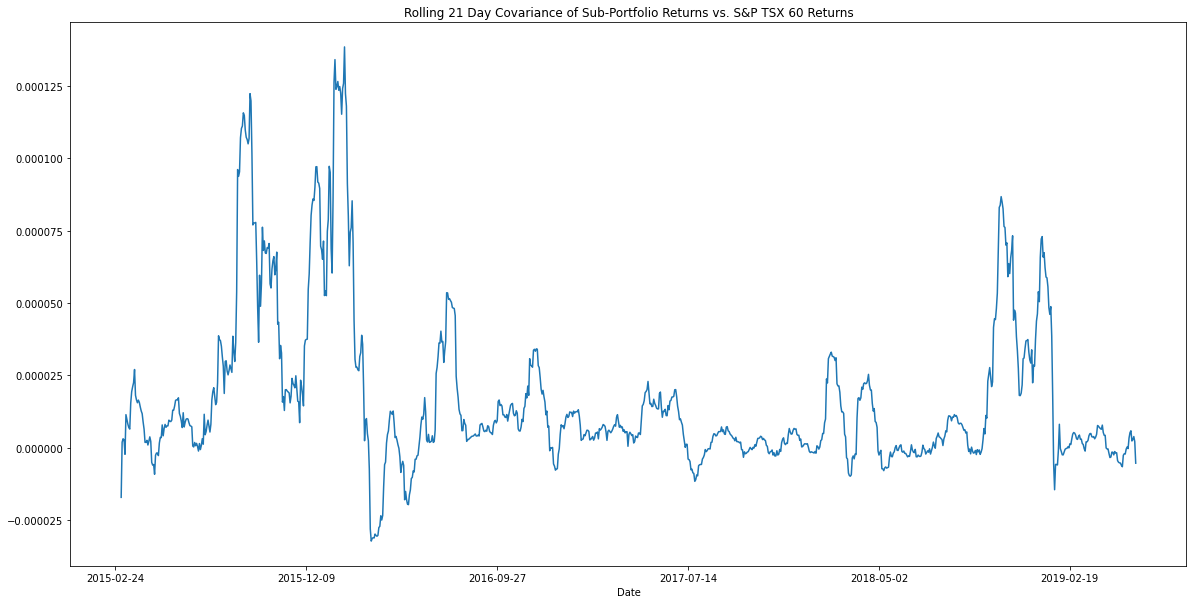

In [119]:

rolling_algo1_covariance.plot(figsize=(20, 10), title='Rolling 21 Day Covariance of Sub-Portfolio Returns vs. S&P TSX 60 Returns')

In [120]:
rolling_algo1_beta.describe()

count   1009.000000
mean       0.222932
std        0.305062
min       -0.796430
25%        0.044204
50%        0.252115
75%        0.426057
max        1.024327
dtype: float64

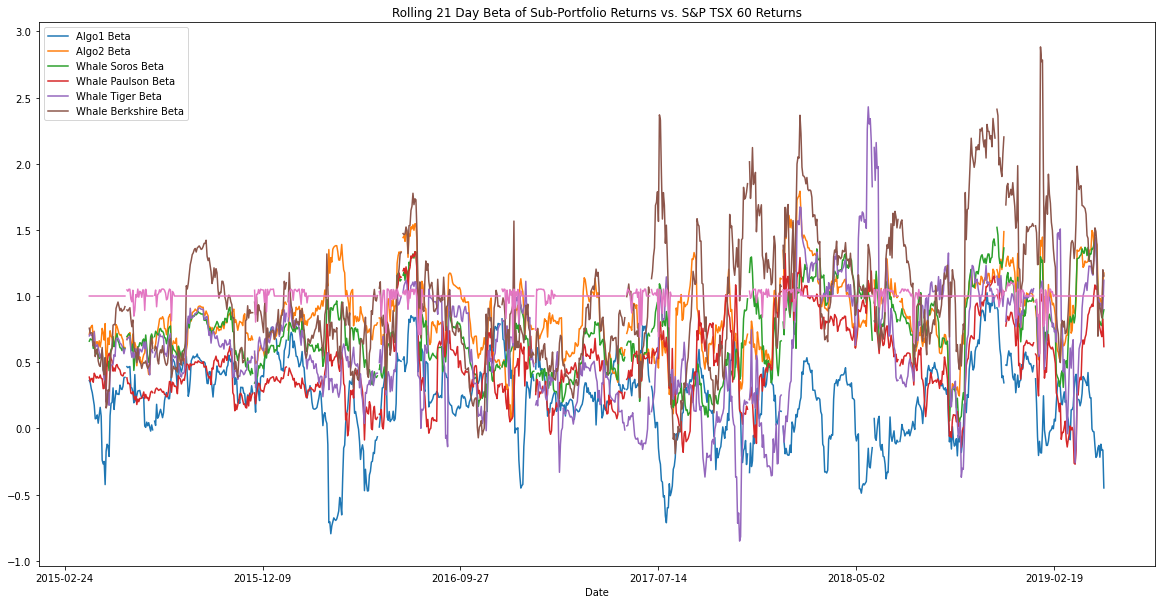

In [121]:


# Plot beta trend
# Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = rolling_algo1_beta.plot(figsize=(20, 10), title="Rolling 21 Day Beta of Sub-Portfolio Returns vs. S&P TSX 60 Returns")
rolling_algo2_beta.plot(ax=ax)
rolling_Soros_beta.plot(ax=ax)
rolling_Paulson_beta.plot(ax=ax)
rolling_Tiger_beta.plot(ax=ax)
rolling_Berkshire_beta.plot(ax=ax)
rolling_SnP_Beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo1 Beta", "Algo2 Beta", "Whale Soros Beta", "Whale Paulson Beta", "Whale Tiger Beta","Whale Berkshire Beta"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [122]:
# Use `ewm` to calculate the rolling window
ewm_21_algo1 = rolling_algo1_beta.ewm(halflife=21, adjust=False).mean()
ewm_21_algo2 = rolling_algo2_beta.ewm(halflife=21, adjust=False).mean()
ewm_21_soros = rolling_Soros_beta.ewm(halflife=21, adjust=False).mean()
ewm_21_paulson = rolling_Paulson_beta.ewm(halflife=21, adjust=False).mean()
ewm_21_tiger = rolling_Tiger_beta.ewm(halflife=21, adjust=False).mean()
ewm_21_berkshire = rolling_Berkshire_beta.ewm(halflife=21, adjust=False).mean()
ewm_SnP_whale = rolling_SnP_Beta.ewm(halflife=21, adjust=False).mean()

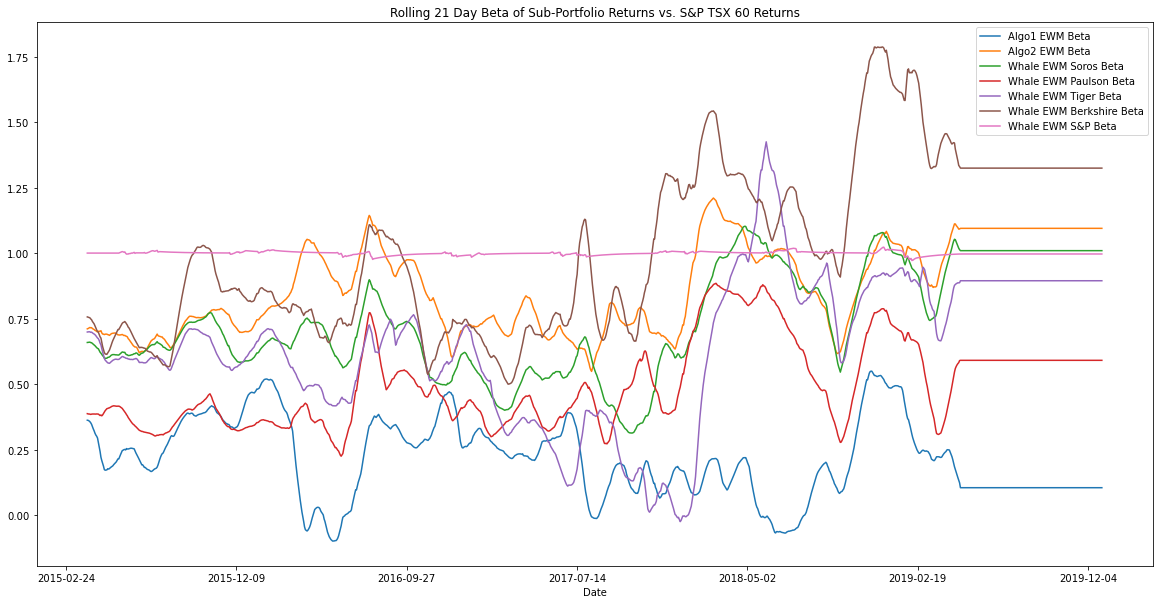

In [123]:


# Plot beta trend
# Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = ewm_21_algo1.plot(figsize=(20, 10), title="Rolling 21 Day Beta of Sub-Portfolio Returns vs. S&P TSX 60 Returns")
ewm_21_algo2.plot(ax=ax)
ewm_21_soros.plot(ax=ax)
ewm_21_paulson.plot(ax=ax)
ewm_21_tiger.plot(ax=ax)
ewm_21_berkshire.plot(ax=ax)
ewm_SnP_whale.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo1 EWM Beta", "Algo2 EWM Beta", "Whale EWM Soros Beta", "Whale EWM Paulson Beta", "Whale EWM Tiger Beta","Whale EWM Berkshire Beta","Whale EWM S&P Beta"])

In [124]:
ewm_21_whale.head()

NameError: name 'ewm_21_whale' is not defined

In [ ]:
ewm_21_algo = merged_daily_returns_df.ewm(halflife=21, min_periods=1).mean()

In [ ]:
ewm_21_algo.head()

In [ ]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})

In [ ]:
df.ewm(com=0.5).mean()

In [128]:
ewm_21_all = merged_daily_returns_df.ewm(halflife=21).std()

In [129]:
ewm_21_all

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                             nan                          nan   
2015-03-04                        0.002472                     0.005814   
2015-03-05                        0.002677                     0.004968   
2015-03-06                        0.005349                     0.004615   
2015-03-09                        0.004638                     0.004471   
...                                    ...                          ...   
2019-04-25                        0.006819                     0.006342   
2019-04-26                        0.006819                     0.006448   
2019-04-29                        0.006708                     0.006357   
2019-04-30                        0.006617                     0.006270   
2019-05-01                        0.006636                     0.006175   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                        nan                             nan   
2015-03-04                   0.001441                        0.007624   
2015-03-05                   0.002478                        0.007020   
2015-03-06                   0.004665                        0.009387   
2015-03-09                   0.005496                        0.008066   
...                               ...                             ...   
2019-04-25                   0.014811                        0.010830   
2019-04-26                   0.014764                        0.010763   
2019-04-29                   0.014575                        0.010601   
2019-04-30                   0.014336                        0.010481   
2019-05-01                   0.014166                        0.010460   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03                  nan                  nan                 nan  
2015-03-04             0.004700             0.002380            0.003648  
2015-03-05             0.004162             0.002662            0.004936  
2015-03-06             0.003419             0.007166            0.005205  
2015-03-09             0.002999             0.006290            0.004517  
...                         ...                  ...                 ...  
2019-04-25             0.006526             0.007500            0.004700  
2019-04-26             0.006433             0.007418            0.004628  
2019-04-29             0.006378             0.007304            0.004564  
2019-04-30             0.006310             0.007200            0.004507  
2019-05-01             0.006208             0.007238            0.004546  

[1029 rows x 7 columns]

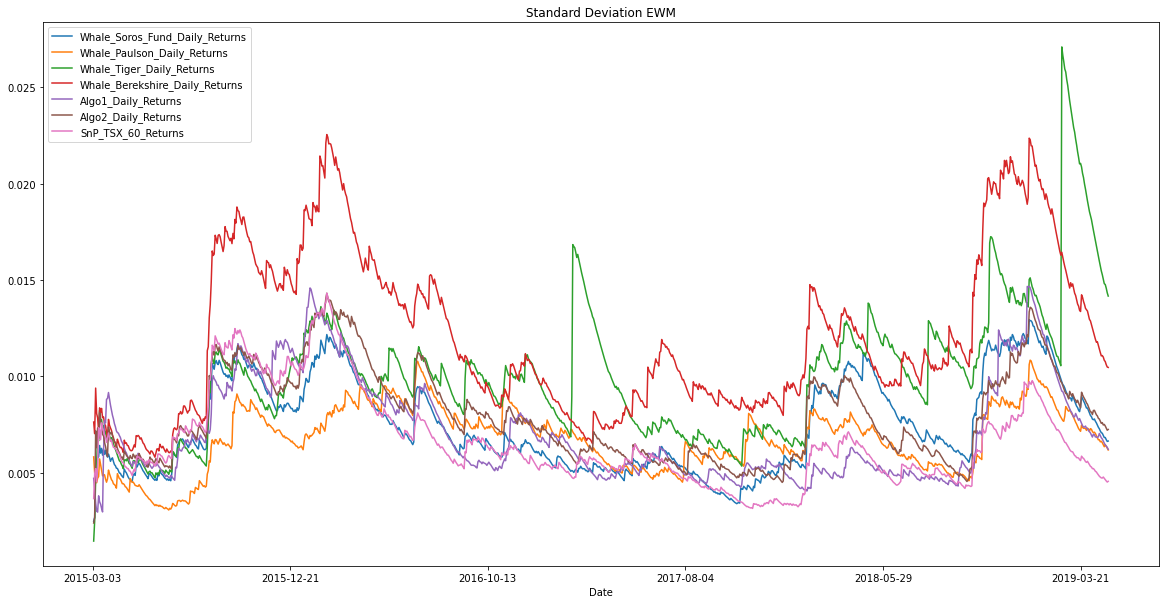

In [130]:
ewm_21_all.plot(figsize=(20, 10), title="Standard Deviation EWM")

In [ ]:
# put the rolling beta into a dataframe


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [131]:
# Annualized Sharpe Ratios
sharpe_ratios = (merged_daily_returns_df.mean() * 252) / (merged_daily_returns_df.std() * np.sqrt(252))
sharpe_ratios

Whale_Soros_Fund_Daily_Returns    0.286709
Whale_Paulson_Daily_Returns      -0.547594
Whale_Tiger_Daily_Returns        -0.144455
Whale_Berekshire_Daily_Returns    0.467045
Algo1_Daily_Returns               1.491514
Algo2_Daily_Returns               0.396817
SnP_TSX_60_Returns                0.195550
dtype: float64

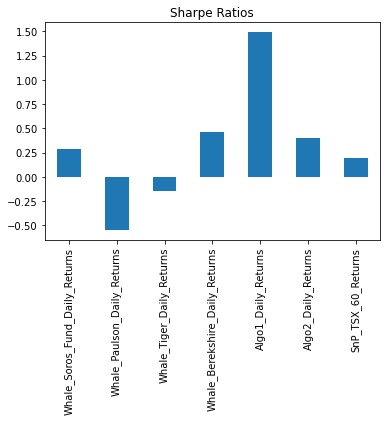

In [132]:
# Visualize the sharpe ratios as a bar plot
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### [[TODO]] Get individual portfolio average sharp ratios to compare overall portfolio types

In [133]:
# Calculate standar deviaton for all investments for each portfolio
harold_std_annual = harold_returns.std() * np.sqrt(252)
my_std_annual = my_returns.std() * np.sqrt(252)

NameError: name 'harold_returns' is not defined

In [ ]:
# Calculate standar deviaton for all investments for each portfolio
harold_std_annual = harold_returns.std() * np.sqrt(252)
my_std_annual = my_returns.std() * np.sqrt(252)

In [ ]:
# Calculate sharpe ratio
harold_sharpe_ratios = (harold_returns.mean() * 252) / (harold_std_annual)
my_sharpe_ratios = (my_returns.mean() * 252) / (my_std_annual)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [134]:
merged_daily_returns_df.head(1)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03            -0.001942            -0.000949           -0.008530

## A. Get Daily Returns for Shopify Stocks 

### 1. Read in csv shopify data

In [135]:
# Reading data from 1st stock - shopify
df_shop = pd.read_csv('Resources/Shopify.csv')

### 2. Inspect data

In [136]:
df_shop.shape

(992, 6)

In [137]:
df_shop.head(3)

Date      Open      High       Low     Close    Volume
0  5/21/2015 16:00:00 28.000000 28.740000 24.110000 25.680000  12303919
1  5/22/2015 16:00:00 26.170000 31.100000 26.000000 28.310000   2842581
2  5/26/2015 16:00:00 29.800000 30.340000 29.080000 29.650000    819883

In [138]:
df_shop.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [139]:
df_shop.count()

Date      992
Open      992
High      992
Low       992
Close     992
Volume    992
dtype: int64

### 3. Convert date to index

In [140]:
df_shop['Date']= pd.to_datetime(df_shop['Date']).dt.strftime('%Y-%m-%d')

In [141]:
df_shop.head(3)

Date      Open      High       Low     Close    Volume
0  2015-05-21 28.000000 28.740000 24.110000 25.680000  12303919
1  2015-05-22 26.170000 31.100000 26.000000 28.310000   2842581
2  2015-05-26 29.800000 30.340000 29.080000 29.650000    819883

In [142]:
# set date as index
df_shop.set_index('Date', inplace=True)

In [143]:
df_shop.head(3)

Open      High       Low     Close    Volume
Date                                                        
2015-05-21 28.000000 28.740000 24.110000 25.680000  12303919
2015-05-22 26.170000 31.100000 26.000000 28.310000   2842581
2015-05-26 29.800000 30.340000 29.080000 29.650000    819883

### 4. Remove unwanted columns

In [144]:
df_shop.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [145]:
df_shop = df_shop[['Close']]

### 5. Sort date index ascending just in case

In [146]:
df_shop.sort_index(inplace=True) # probably not necssary but just in case

### 6. Get daily returns & remove closing cost

In [147]:
df_shop['Shop_Daily_Returns'] = df_shop['Close'].pct_change()

In [148]:
df_shop = df_shop[['Shop_Daily_Returns']]

### 7. Review and drop  nulls

In [149]:
df_shop.isna().sum() # first row would be null

Shop_Daily_Returns    1
dtype: int64

In [150]:
df_shop.dropna(inplace=True)

In [151]:
df_shop.isna().sum() #null should be gone

Shop_Daily_Returns    0
dtype: int64

## B. Get Daily Returns For Open Text Stocks 

### 1. Read in csv for Open Text

In [152]:
# Reading data from 2nd stock - Otex
df_otex = pd.read_csv('Resources/Otex.csv')

### 2. Inspect dataframe

### 3. Convert date to index

In [153]:
df_otex['Date']= pd.to_datetime(df_otex['Date']).dt.strftime('%Y-%m-%d')

In [154]:
# set date as index
df_otex.set_index('Date', inplace=True)

In [155]:
### 4. Remove unwanted columns -declutter

In [156]:
df_otex = df_otex[['Close']]

In [157]:
### 5. Sort date index ascending just in case

In [158]:
df_otex.sort_index(inplace=True) # probably not necssary but just in case

In [159]:
### 6. Get daily returns & remove closing cost

In [160]:
df_otex['Otex_Daily_Returns'] = df_otex['Close'].pct_change()

In [161]:
df_otex = df_otex[['Otex_Daily_Returns']]

In [162]:
### 7. Review and drop nulls

In [163]:
df_otex.isna().sum() # first row would be null

Otex_Daily_Returns    1
dtype: int64

In [164]:
df_otex.dropna(inplace=True)

## C. Get Returns for Loblaw Stocks

### 1. Read in csv for Loblaw

In [165]:
# Reading data from 3rd stock - Loblaw
df_lob = pd.read_csv('Resources/TSE_L.csv')

### 2. Inspect dataframe

In [193]:
df_lob.head(3)

Loblaw_Daily_Returns
Date                            
2015-01-05             -0.020951
2015-01-06             -0.020050
2015-01-07              0.009837

In [ ]:
df_lob.tail(3)

In [194]:
df_lob.shape

(1079, 1)

In [195]:
df_lob.dtypes

Loblaw_Daily_Returns    float64
dtype: object

### 3. Convert date to index

In [166]:
df_lob['Date']= pd.to_datetime(df_lob['Date']).dt.strftime('%Y-%m-%d')

In [167]:
# set date as index
df_lob.set_index('Date', inplace=True)

In [168]:
### 4. Remove unwanted columns -declutter

In [169]:
df_lob = df_lob[['Close']]

In [170]:
### 5. Sort date index ascending just in case

In [171]:
df_lob.sort_index(inplace=True) # probably not necssary but just in case

In [172]:
### 6. Get daily returns & remove closing cost

In [173]:
df_lob['Loblaw_Daily_Returns'] = df_lob['Close'].pct_change()

In [174]:
df_lob = df_lob[['Loblaw_Daily_Returns']]

### 7. Review and drop nulls

In [175]:
df_lob.isna().sum() # first row would be null

Loblaw_Daily_Returns    1
dtype: int64

In [176]:
df_lob.dropna(inplace = True)

### 8. Have a final look at the data - plot and describe

In [197]:
df_lob.describe()

Loblaw_Daily_Returns
count           1079.000000
mean               0.000246
std                0.009749
min               -0.054790
25%               -0.005123
50%                0.000000
75%                0.005670
max                0.047793

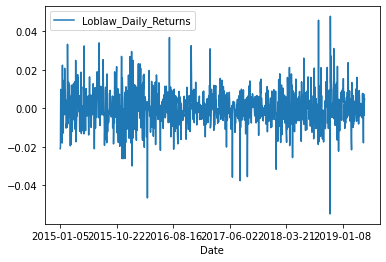

In [196]:
df_lob.plot() # have a quick look that it is centred around zero

## D. Concat New Stock Daily Returns into Single Dataframe

### 1. Perform inner concat to ensure dates line up

In [198]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
merged_analysis_newstock_df_tmp = pd.concat([df_lob, df_otex], axis="columns", join="inner")

In [200]:
merged_newstock_daily_returns_df = pd.concat([merged_analysis_newstock_df_tmp, df_shop], axis="columns", join="inner")

### 2. Inspect data in newly merged 

In [201]:
merged_newstock_daily_returns_df.head(5)

Loblaw_Daily_Returns  Otex_Daily_Returns  Shop_Daily_Returns
Date                                                                    
2015-05-22             -0.000742            0.013660            0.102414
2015-05-26              0.001108           -0.006506            0.047333
2015-05-27              0.006458           -0.007484           -0.072513
2015-05-28             -0.006049            0.002356           -0.001818
2015-05-29             -0.013833           -0.002351           -0.009107

In [202]:
merged_newstock_daily_returns_df.tail(5)

Loblaw_Daily_Returns  Otex_Daily_Returns  Shop_Daily_Returns
Date                                                                    
2019-04-24             -0.017863            0.000525           -0.016246
2019-04-25              0.007398            0.005506           -0.003821
2019-04-26             -0.003672            0.001825            0.015116
2019-04-29              0.002918           -0.003904            0.015791
2019-04-30              0.004900            0.004703            0.078569

In [203]:
merged_newstock_daily_returns_df.shape

(966, 3)

In [204]:
merged_newstock_daily_returns_df.dtypes

Loblaw_Daily_Returns    float64
Otex_Daily_Returns      float64
Shop_Daily_Returns      float64
dtype: object

In [207]:
merged_newstock_daily_returns_df.index.dtype # check the data type of the index

dtype('O')

In [205]:
merged_newstock_daily_returns_df.isna().sum() # no nulls found, already removed in last step

Loblaw_Daily_Returns    0
Otex_Daily_Returns      0
Shop_Daily_Returns      0
dtype: int64

In [ ]:
### 3. Plot Merged Daily Returns Data

Text(0, 0.5, 'Date')

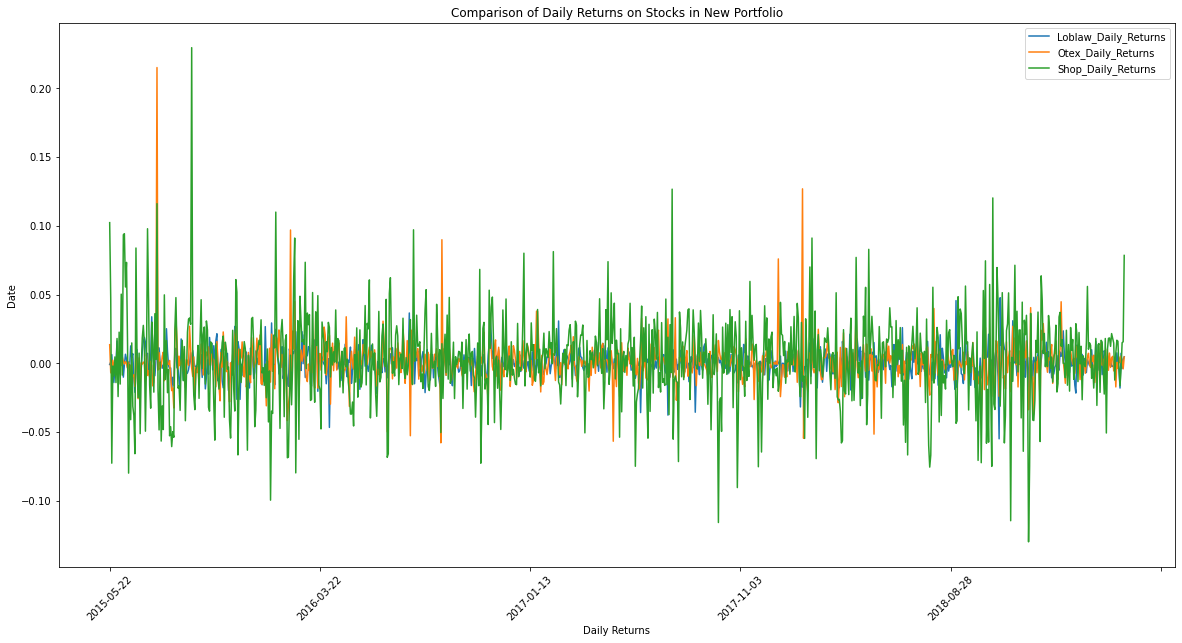

In [212]:
drp = merged_newstock_daily_returns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Returns on Stocks in New Portfolio')
drp.set_xlabel("Daily Returns")
drp.set_ylabel("Date")


## E. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
### 1. Set even weights across the 3 new portfolios

In [183]:
# Set weights
weights = [1/3, 1/3, 1/3]



In [ ]:
# Calculate portfolio return

In [ ]:
# Display sample data

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [184]:
# Join your returns DataFrame to the original returns DataFrame


In [185]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [186]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [187]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [188]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [189]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [190]:
# Calculate Annualzied Sharpe Ratios


In [191]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

### References

Shift function in pandas - 
https://stackoverflow.com/questions/20000726/calculate-daily-returns-with-pandas-dataframe

Conditional line color -  
https://stackoverflow.com/questions/31590184/plot-multicolored-line-based-on-conditional-in-python

https://stackoverflow.com/questions/40803570/python-matplotlib-scatter-plot-specify-color-points-depending-on-conditions/40804861

https://stackoverflow.com/questions/42453649/conditional-color-with-matplotlib-scatter

https://stackoverflow.com/questions/3832809/how-to-change-the-color-of-a-single-bar-if-condition-is-true-matplotlib

https://stackoverflow.com/questions/56779975/conditional-coloring-in-matplotlib-using-numpys-where

Google finance - https://support.google.com/docs/answer/3093281?hl=en

Boxplots - https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

PEP 8 - Standards - 



# Instructions: sUnit 4 Homework Assignment: A Whale Off the Port(folio)

![Portfolio Analysis](Images/portfolio-analysis.png)

## Background

Harold's company has been investing in algorithmic trading strategies. Some of the investment managers love them, some hate them, but they all think their way is best.

You just learned these quantitative analysis techniques with Python and Pandas, so Harold has come to you with a challenge—to help him determine which portfolio is performing the best across multiple areas: volatility, returns, risk, and Sharpe ratios.

You need to create a tool (an analysis notebook) that analyzes and visualizes the major metrics of the portfolios across all of these areas, and determine which portfolio outperformed the others. You will be given the historical daily returns of several portfolios: some from the firm's algorithmic portfolios, some that represent the portfolios of famous "whale" investors like Warren Buffett, and some from the big hedge and mutual funds. You will then use this analysis to create a custom portfolio of stocks and compare its performance to that of the other portfolios, as well as the larger market ([S&P TSX 60 Index](https://en.wikipedia.org/wiki/S%26P/TSX_60)).

For this homework assignment, you have three main tasks:

1. [Read in and Wrangle Returns Data](#Prepare-the-Data)

2. [Determine Success of Each Portfolio](#Conduct-Quantitative-Analysis)

3. [Choose and Evaluate a Custom Portfolio](#Create-a-Custom-Portfolio)

---

## Instructions

**Files:**

* [Whale Analysis Starter Code](Starter_Code/whale_analysis.ipynb)

* [algo_returns.csv](Starter_Code/Resources/algo_returns.csv)

* [otex_historical.csv](Starter_Code/Resources/otex_historical.csv)

* [sp_tsx_history.csv](Starter_Code/Resources/sp_tsx_history.csv)

* [l_historical.csv](Starter_Code/Resources/l_historical.csv)

* [shop_historical.csv](Starter_Code/Resources/shop_historical.csv)

* [whale_returns.csv](Starter_Code/Resources/whale_returns.csv)

### Prepare the Data

First, read and clean several CSV files for analysis. The CSV files include whale portfolio returns, algorithmic trading portfolio returns, and S&P TSX 60 Index historical prices. Use the starter code to complete the following steps:

1. Use Pandas to read the following CSV files as a DataFrame. Be sure to convert the dates to a `DateTimeIndex`.

    * `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

    * `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

    * `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

2. Detect and remove null values.

3. If any columns have dollar signs or characters other than numeric values, remove those characters and convert the data types as needed.

4. The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.

5. Join `Whale Returns`, `Algorithmic Returns`, and the `S&P TSX 60 Returns` into a single DataFrame with columns for each portfolio's returns.

    ![returns-dataframe.png](Images/returns-dataframe.png)

### Conduct Quantitative Analysis

Analyze the data to see if any of the portfolios outperform the stock market (i.e., the S&P TSX 60).

#### Performance Analysis

1. Calculate and plot daily returns of all portfolios.

2. Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P TSX 60?

#### Risk Analysis

1. Create a box plot for each of the returns. 

2. Calculate the standard deviation for each portfolio. 

3. Determine which portfolios are riskier than the S&P TSX 60

4. Calculate the Annualized Standard Deviation.

#### Rolling Statistics

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.

2. Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.

3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

#### Rolling Statistics Challenge: Exponentially Weighted Average

An alternative method to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

### Sharpe Ratios

Investment managers and their institutional investors look at the return-to-risk ratio, not just the returns. After all, if you have two portfolios that each offer a 10% return, yet one is lower risk, you would invest in the lower-risk portfolio, right?

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.

2. Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

### Create a Custom Portfolio

Harold is ecstatic that you were able to help him prove that the algorithmic trading portfolios are doing so well compared to the market and whales portfolios. However, now you are wondering whether you can choose your own portfolio that performs just as well as the algorithmic portfolios. Investigate by doing the following:

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the built-in Google Finance function to choose 3-5 stocks for your portfolio.

2. Download the data as CSV files and calculate the portfolio returns.

3. Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.

4. Add your portfolio returns to the DataFrame with the other portfolios.

5. Run the following analyses:

    * Calculate the Annualized Standard Deviation.
    * Calculate and plot rolling `std` with a 21-day window.
    * Calculate and plot the correlation.
    * Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.
    * Calculate the Sharpe ratios and generate a bar plot.

4. How does your portfolio do?

---

## Resources

* [Pandas API Docs](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

* [Exponential weighted function in Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)

* [`GOOGLEFINANCE` function help](https://support.google.com/docs/answer/3093281)

* [Supplemental Guide: Fetching Stock Data Using Google Sheets](../../../01-Lesson-Plans/04-Pandas/Supplemental/googlefinance_guide.md)

---

## Hints

* After reading each CSV file, don't forget to sort each DataFrame in ascending order by the Date using `sort_index`. This is especially important when working with time series data, as we want to make sure Date indexes go from earliest to latest.

* The Pandas functions used in class this week will be useful for this assignment.

* Be sure to use `head()` or `tail()` when you want to look at your data, but don't want to print to a large DataFrame.

---

## Submission

1. Use the provided starter Jupyter Notebook to house the code for your data preparation, analysis, and visualizations. Put any analysis or answers to assignment questions in raw text (markdown) cells in the report.

2. Submit your notebook to a new GitHub repository.

3. Add the URL of your GitHub repository to your assignment when submitting via Bootcamp Spot.

---

© 2020 Trilogy Education Services, a 2U, Inc. brand. All Rights Reserved.

